In [39]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import cupy as np # linear algebra
import cudf as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
#     for filename in filenames:
#         print(os.path.join(dirname, filename))
    print(dirname)

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input
/kaggle/input/cartoon-classification
/kaggle/input/cartoon-classification/cartoon_classification
/kaggle/input/cartoon-classification/cartoon_classification/TEST
/kaggle/input/cartoon-classification/cartoon_classification/TEST/adventure_time
/kaggle/input/cartoon-classification/cartoon_classification/TEST/Tsubasa
/kaggle/input/cartoon-classification/cartoon_classification/TEST/southpark
/kaggle/input/cartoon-classification/cartoon_classification/TEST/spongebob
/kaggle/input/cartoon-classification/cartoon_classification/TEST/Gumball
/kaggle/input/cartoon-classification/cartoon_classification/TEST/smurfs
/kaggle/input/cartoon-classification/cartoon_classification/TEST/tom_and_jerry
/kaggle/input/cartoon-classification/cartoon_classification/TEST/catdog
/kaggle/input/cartoon-classification/cartoon_classification/TEST/pokemon
/kaggle/input/cartoon-classification/cartoon_classification/TEST/Familyguy
/kaggle/input/cartoon-classification/cartoon_classification/TRAIN
/kaggle/inp

In [40]:
import cv2
import matplotlib.pyplot as plt
from keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications.vgg16 import VGG16
from keras.models import Sequential
from keras.layers import Activation, Dropout, Flatten, Dense

Sample Image , Image shape is:  (360, 490, 3) , type is :  <class 'numpy.ndarray'>


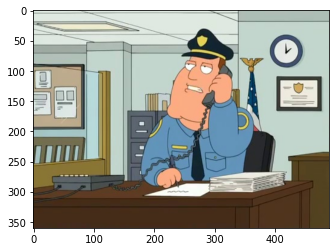

In [41]:
ad_time = '../input/cartoon-classification/cartoon_classification/TRAIN/Familyguy/family_guy1000.jpg'
ad_time = cv2.imread(ad_time)
print("Sample Image",", Image shape is: ",ad_time.shape,", type is : ",type(ad_time))
ad_time= cv2.cvtColor(ad_time, cv2.COLOR_BGR2RGB)
plt.imshow(ad_time)

In [42]:
img_width, img_height = 250, 350 #
train_data_dir = r'../input/cartoon-classification/cartoon_classification/TRAIN'
validation_data_dir = r'../input/cartoon-classification/cartoon_classification/TEST/'

In [43]:
batch_size=8

In [44]:
train_datagen = ImageDataGenerator(
    rescale=1. / 255,
    shear_range=0.2,
    zoom_range=0.2,
    vertical_flip=True)

test_datagen = ImageDataGenerator(rescale=1. / 255)

In [45]:
train_generator = train_datagen.flow_from_directory(
    train_data_dir,
    target_size=(img_height, img_width),
    batch_size=batch_size,
    class_mode='categorical')

validation_generator = test_datagen.flow_from_directory(
    validation_data_dir,
    target_size=(img_height, img_width),
    batch_size=batch_size,
    class_mode='categorical')

Found 119617 images belonging to 10 classes.
Found 18110 images belonging to 10 classes.


In [46]:
numberOfClass=10
epochs=8

In [47]:
vgg = VGG16(pooling='avg', weights='imagenet', include_top=False, input_shape=(250,350,3))
vgg_layer_list = vgg.layers

In [48]:
model = Sequential()
for layer in vgg_layer_list:
    model.add(layer)
    
for layer in model.layers:
    layer.trainable = False
    
    
model.add(Flatten())
model.add(Dense(1024))
model.add(Activation('relu'))
model.add(Dropout(0.2))

model.add(Dense(1024))
model.add(Activation('relu'))
model.add(Dropout(0.2))

model.add(Dense(10))
model.add(Activation('softmax'))
model.summary()

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
block1_conv1 (Conv2D)        (None, 250, 350, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 250, 350, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 125, 175, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 125, 175, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 125, 175, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 62, 87, 128)       0         
_________________________________________________________________
block3_conv1 (Conv2D)        (None, 62, 87, 256)      

In [49]:
model.compile(optimizer='adam', loss="categorical_crossentropy", metrics=["accuracy"])

In [50]:
hist = model.fit_generator(
        generator=train_generator,
        steps_per_epoch = 1600,
        epochs=epochs,
        validation_data=validation_generator,
        validation_steps = 250,
        shuffle=True)

/opt/conda/lib/python3.7/site-packages/keras/engine/training.py:1972: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Epoch 1/8
1600/1600 [==============================] - 432s 269ms/step - loss: 0.7194 - accuracy: 0.7543 - val_loss: 0.6843 - val_accuracy: 0.7790
Epoch 2/8
1600/1600 [==============================] - 426s 266ms/step - loss: 0.3746 - accuracy: 0.8754 - val_loss: 0.7389 - val_accuracy: 0.7665
Epoch 3/8
1600/1600 [==============================] - 428s 267ms/step - loss: 0.2955 - accuracy: 0.9008 - val_loss: 0.7767 - val_accuracy: 0.7795
Epoch 4/8
1600/1600 [==============================] - 420s 262ms/step - loss: 0.2544 - accuracy: 0.9177 - val_loss: 0.5776 - val_accuracy: 0.8520
Epoch 5/8
1600/1600 [==============================] - 423s 264ms/step - loss: 0.2247 - accuracy: 0.9285 - val_loss: 0.6076 - val_accuracy: 0.8190
Epoch 6/8
1600/1600 [==============================] - 418s 261ms/step - loss: 0.2063 - accuracy: 0.9317 - val_loss: 0.8212 - val_accuracy: 0.7820
Epoch 7/8
1600/1600 [==============================] - 430s 269ms/step - loss: 0.2045 - accuracy: 0.9329 - val_loss: 0

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


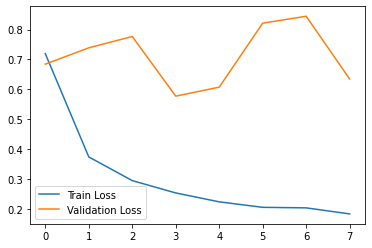

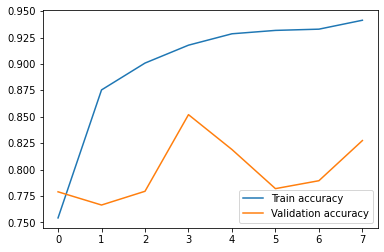

In [51]:
print(hist.history.keys())

plt.plot(hist.history["loss"], label ="Train Loss")
plt.plot(hist.history["val_loss"], label ="Validation Loss")
plt.legend()
plt.show()
plt.figure()
plt.plot(hist.history["accuracy"], label ="Train accuracy")
plt.plot(hist.history["val_accuracy"], label ="Validation accuracy")
plt.legend()
plt.show()